# **_Chess Piece Classification_**

### __*This CNN is supposed to determine what kind of Chess Piece is in the Image*__

<br>

### __*Import Libraries and choose the device*__

In [13]:
# Import of the Libraries
import os
import CNN

# Torch libraries
import torch
from torch.utils.data import DataLoader

# Device config
GPU = CNN.pick_device()

Using the Graphics Card


<br>

### __*Training Preparation (Set all variables here)*__

In [14]:
# Hyper-parameters
num_epochs = 15             # How many times to repeat learning
batch_size = 32             # Number of images to send at once
learning_rate = 0.0001      # How quickly should it learn

# Image Dimensions
IMG_SIZE = 85               # 85*85 pixels
COLOUR_SIZE = 1

# Define the directory
FILE_PATH = './data/chess/pieces'           # Sub-Folders Location
TRAIN_CSV = './data/chess/train_data.csv'   # Train CSV Location
TEST_CSV = './data/chess/test_data.csv'     # Test CSV Location
CATEGORIES = os.listdir(FILE_PATH)          # Turn Sub-Folder names into a list
N_CLASSES = len(CATEGORIES)                 # Number of different classes

# Create the Model
model = CNN.model.ConvNet(IMG_SIZE, IMG_SIZE, N_CLASSES,COLOUR_SIZE).to(GPU)

# Choose type of Loss & Optimization function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

<br>

### __*Dataset Creation*__

In [15]:
# Normalized Transformation
MEAN, STD = CNN.dataset.get_normal(FILE_PATH, IMG_SIZE, IMG_SIZE)
trans_normal = CNN.dataset.trans_normal(IMG_SIZE, IMG_SIZE, MEAN, STD)

# Create the .csv file & dictionary
indexing = CNN.dataset.create_csv(FILE_PATH, train_csv=TRAIN_CSV, test_csv=TEST_CSV,
                      rewrite=True, split=True, test_ratio=0.2, mul=16)

# Create the Datasets
train_dataset = CNN.dataset.CustomDataset(FILE_PATH, TRAIN_CSV, transform=trans_normal)
test_dataset = CNN.dataset.CustomDataset(FILE_PATH, TEST_CSV, transform=trans_normal)

# Create the DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

#### __*Look at some data*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


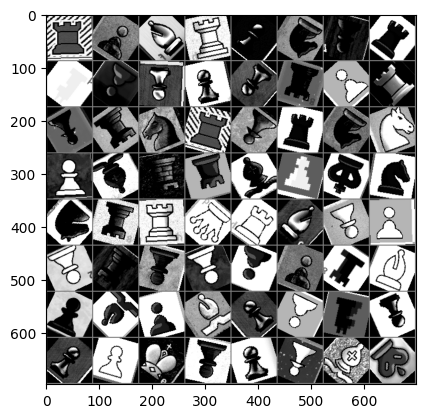

Batch size: 64 | Colour size: 1 | Image Size: 85*85 pixels


In [ ]:
# Get dataset overview
CNN.visual.overview(train_dataset, test_dataset, indexing)

<br>

### __*Training Loop*__

In [ ]:
# Train the Model
CNN.model.train_model(model, train_loader, criterion, optimizer, num_epochs, device=GPU)

# Save the Model
SAVE_PATH = './data/chess/chess.pth'
CNN.model.save_model(model, SAVE_PATH)

# Test the Model
res = CNN.model.load_model(model, test_loader, CATEGORIES, show_wrongs=True)

<br>

### __*Fine-Tuning*__

In [ ]:
# Fine-Tuning Loop
high_res = res
while high_res != 100:
    # Load the most accurate model save
    # model.load_state_dict(torch.load(SAVE_PATH, map_location=GPU))

    # Train the model
    CNN.model.train_model(model, train_loader, criterion, optimizer, n_epochs=1, device=GPU)

    # Test the model
    current_res = CNN.model.load_model(model, test_loader, CATEGORIES, class_results=False)

    # Update the model save with higher precision
    if high_res < current_res:
        high_res = current_res
        CNN.model.save_model(model, SAVE_PATH)